# Optical Detectors

**Scott Prahl**

**Sept 2023**

---
*If* `` ofiber `` *is not installed, uncomment the following cell (i.e., delete the initial #) and execute it with* `` shift-enter ``.  *Afterwards, you may need to restart the kernel/runtime before the module will import successfully.*"

In [1]:
# Jupyterlite support for ofiber
try:
    import micropip
    await micropip.install("ofiber")
except ModuleNotFoundError:
    pass

import matplotlib.pyplot as plt
import numpy as np
import ofiber

# to make graphs a bit better
%config InlineBackend.figure_format='retina'


## Analog and digital modulation

### Amplitude Modulation

Ghatak Figure 13.2

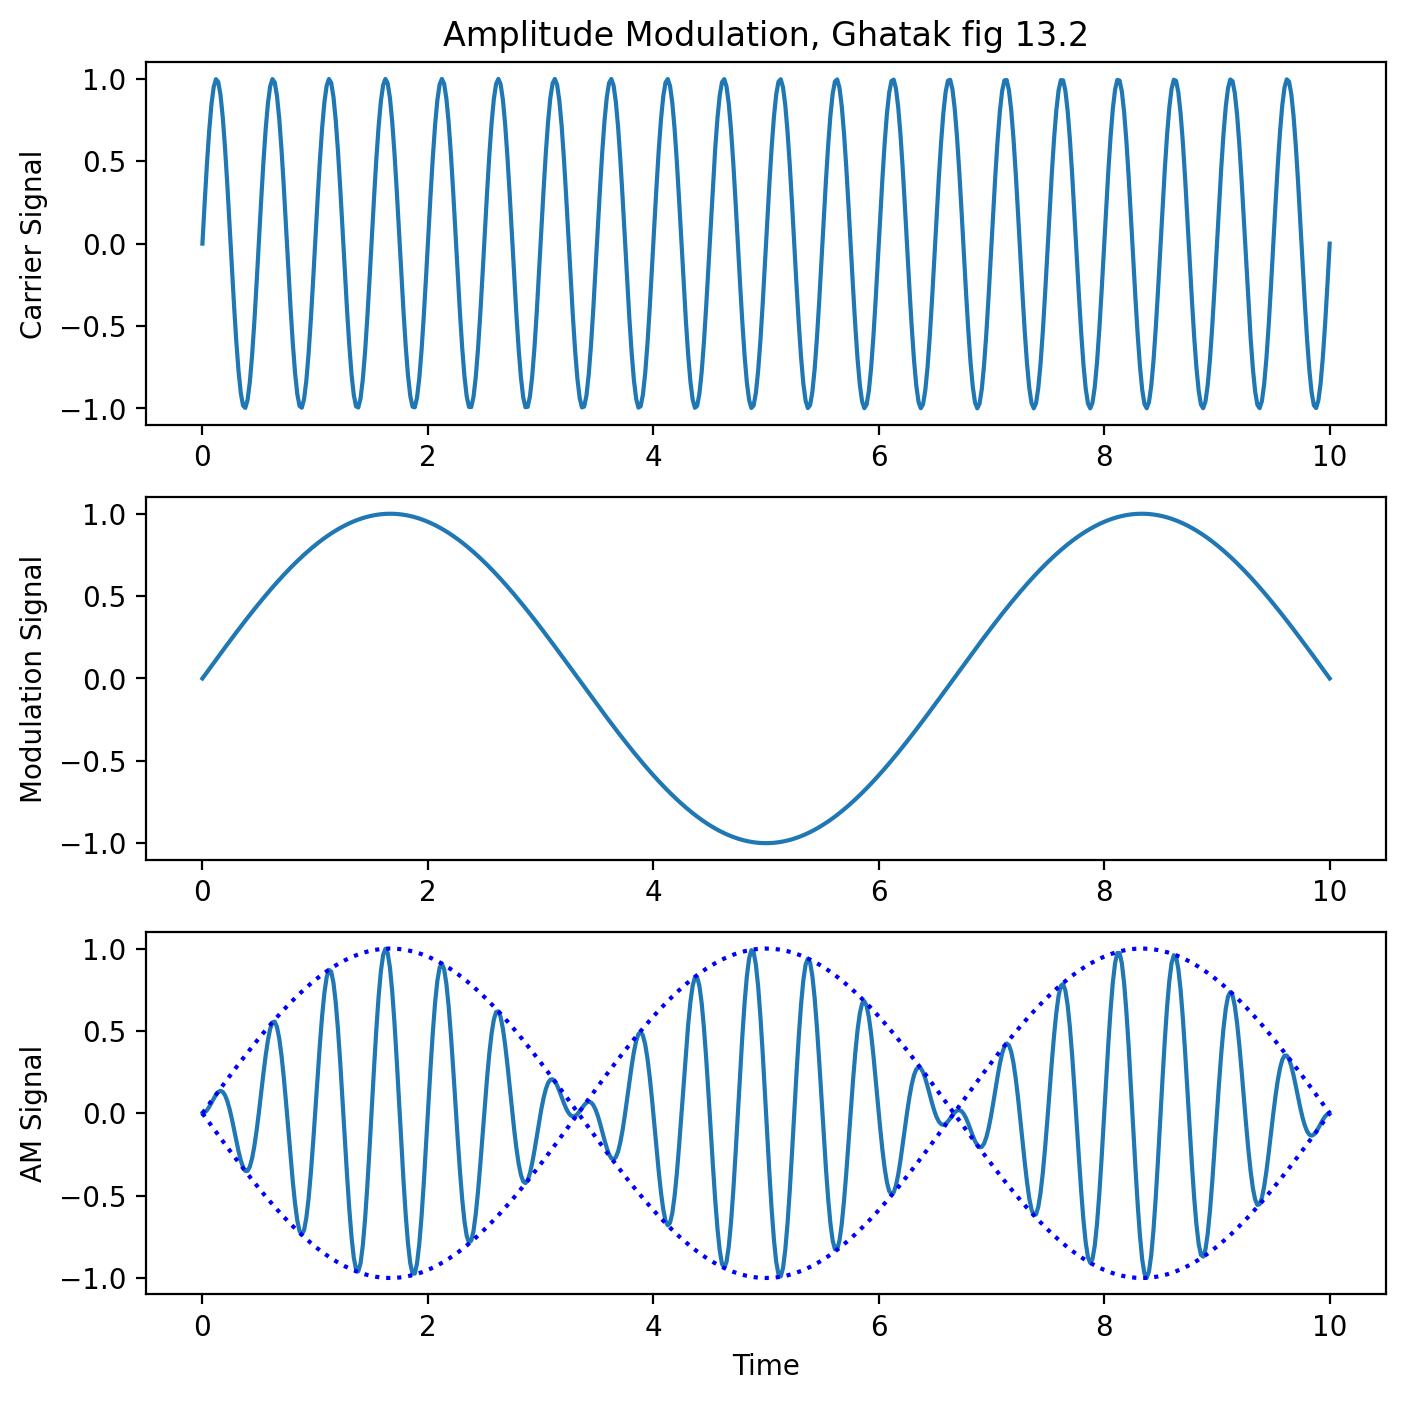

In [2]:
t=np.linspace(0,10,500)
fcarrier = 2*np.pi*2
fmod = 2*np.pi*0.15

plt.subplots(3,1,figsize=(8,8))

plt.subplot(3,1,1)
plt.plot(t, np.sin(fcarrier*t))
plt.title('Amplitude Modulation, Ghatak fig 13.2')
plt.ylabel('Carrier Signal')

plt.subplot(3,1,2)
plt.plot(t, np.sin(fmod*t))
plt.ylabel('Modulation Signal')

plt.subplot(3,1,3)
plt.plot(t, np.sin(fmod*t)*np.sin(fcarrier*t))
plt.plot(t, np.sin(fmod*t),':b')
plt.plot(t, -np.sin(fmod*t),':b')

plt.ylabel('AM Signal')
plt.xlabel('Time')

plt.show()

### Frequency Modulation

Figure 13.3

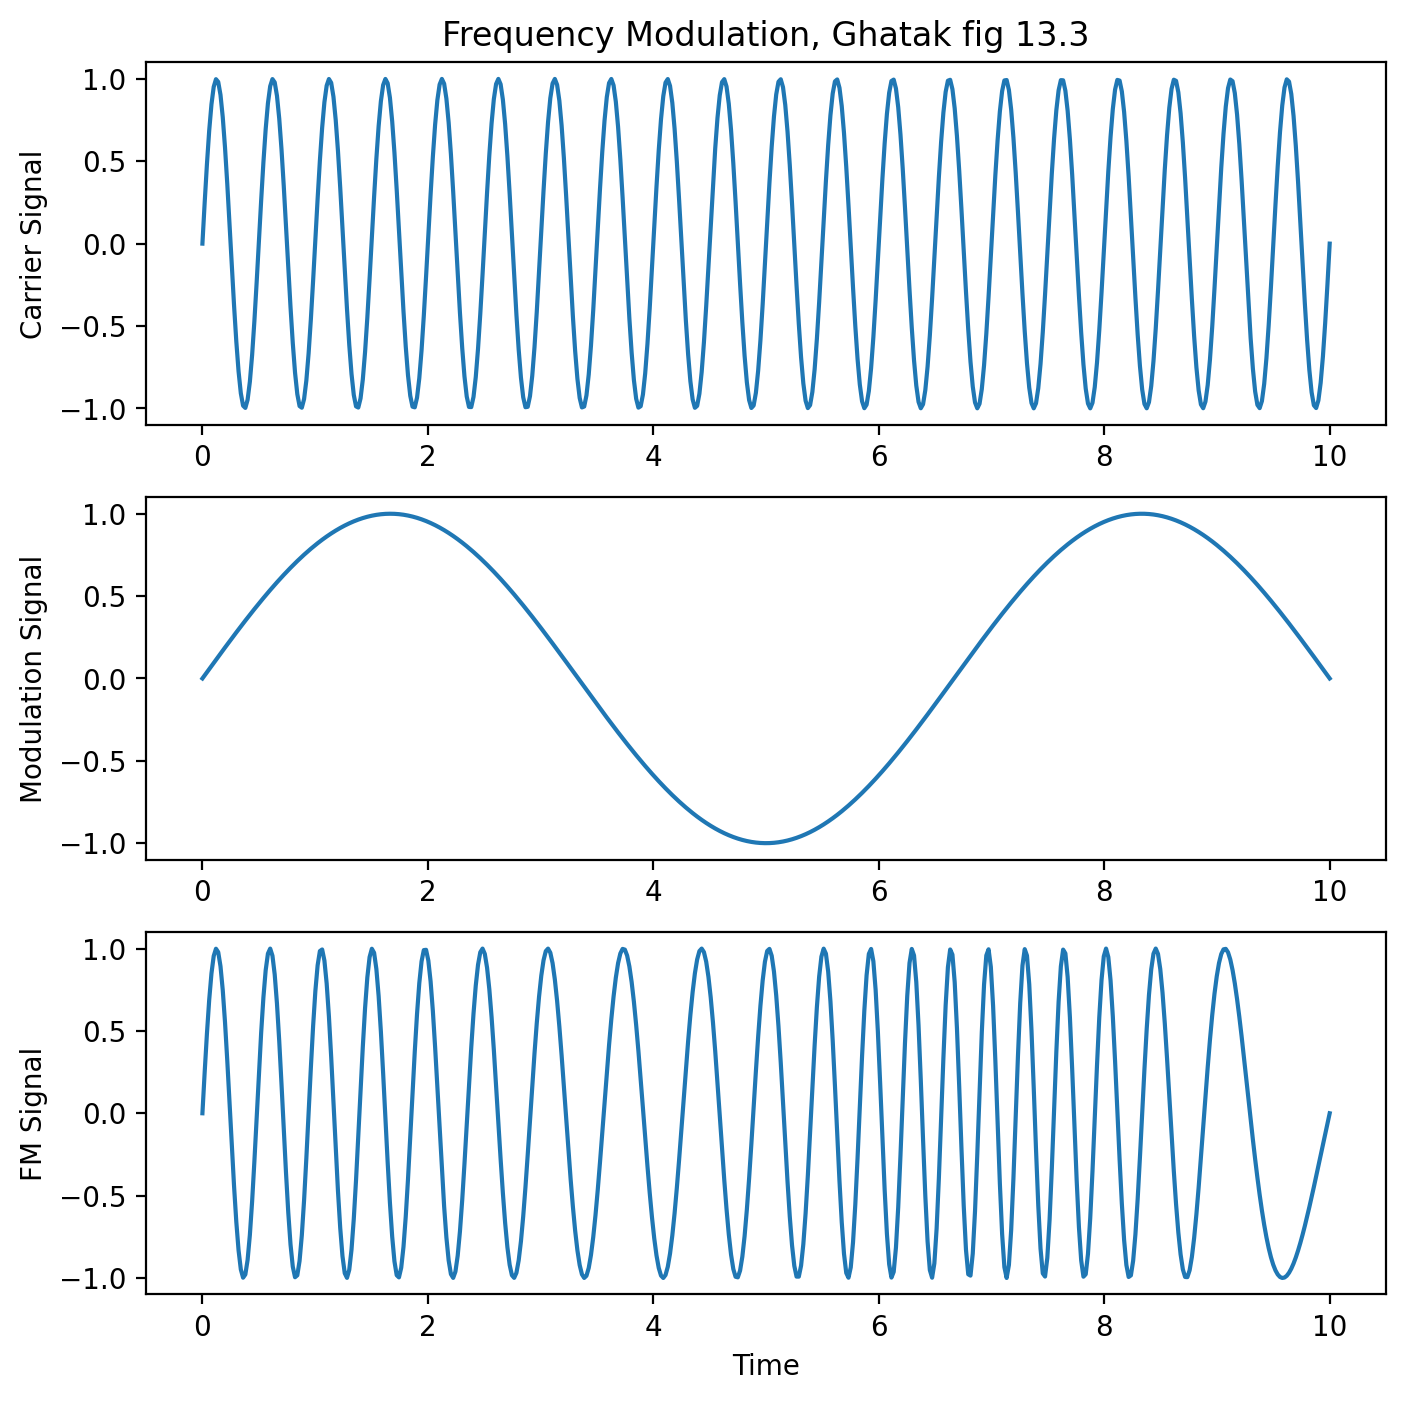

In [3]:
t=np.linspace(0,10,500)
fcarrier = 2*np.pi*2
fmod = 2*np.pi*0.15

plt.subplots(3,1,figsize=(8,8))

plt.subplot(3,1,1)
plt.plot(t, np.sin(fcarrier*t))
plt.title('Frequency Modulation, Ghatak fig 13.3')
plt.ylabel('Carrier Signal')

plt.subplot(3,1,2)
plt.plot(t, np.sin(fmod*t))
plt.ylabel('Modulation Signal')

plt.subplot(3,1,3)
ff = fcarrier + np.sin(fmod*t)
plt.plot(t, np.sin(ff*t))
plt.ylabel('FM Signal')
plt.xlabel('Time')

plt.show()

### Digital Sampling

Ghatak Figure 13.4.  Pulse amplitude modulation.  Encoding

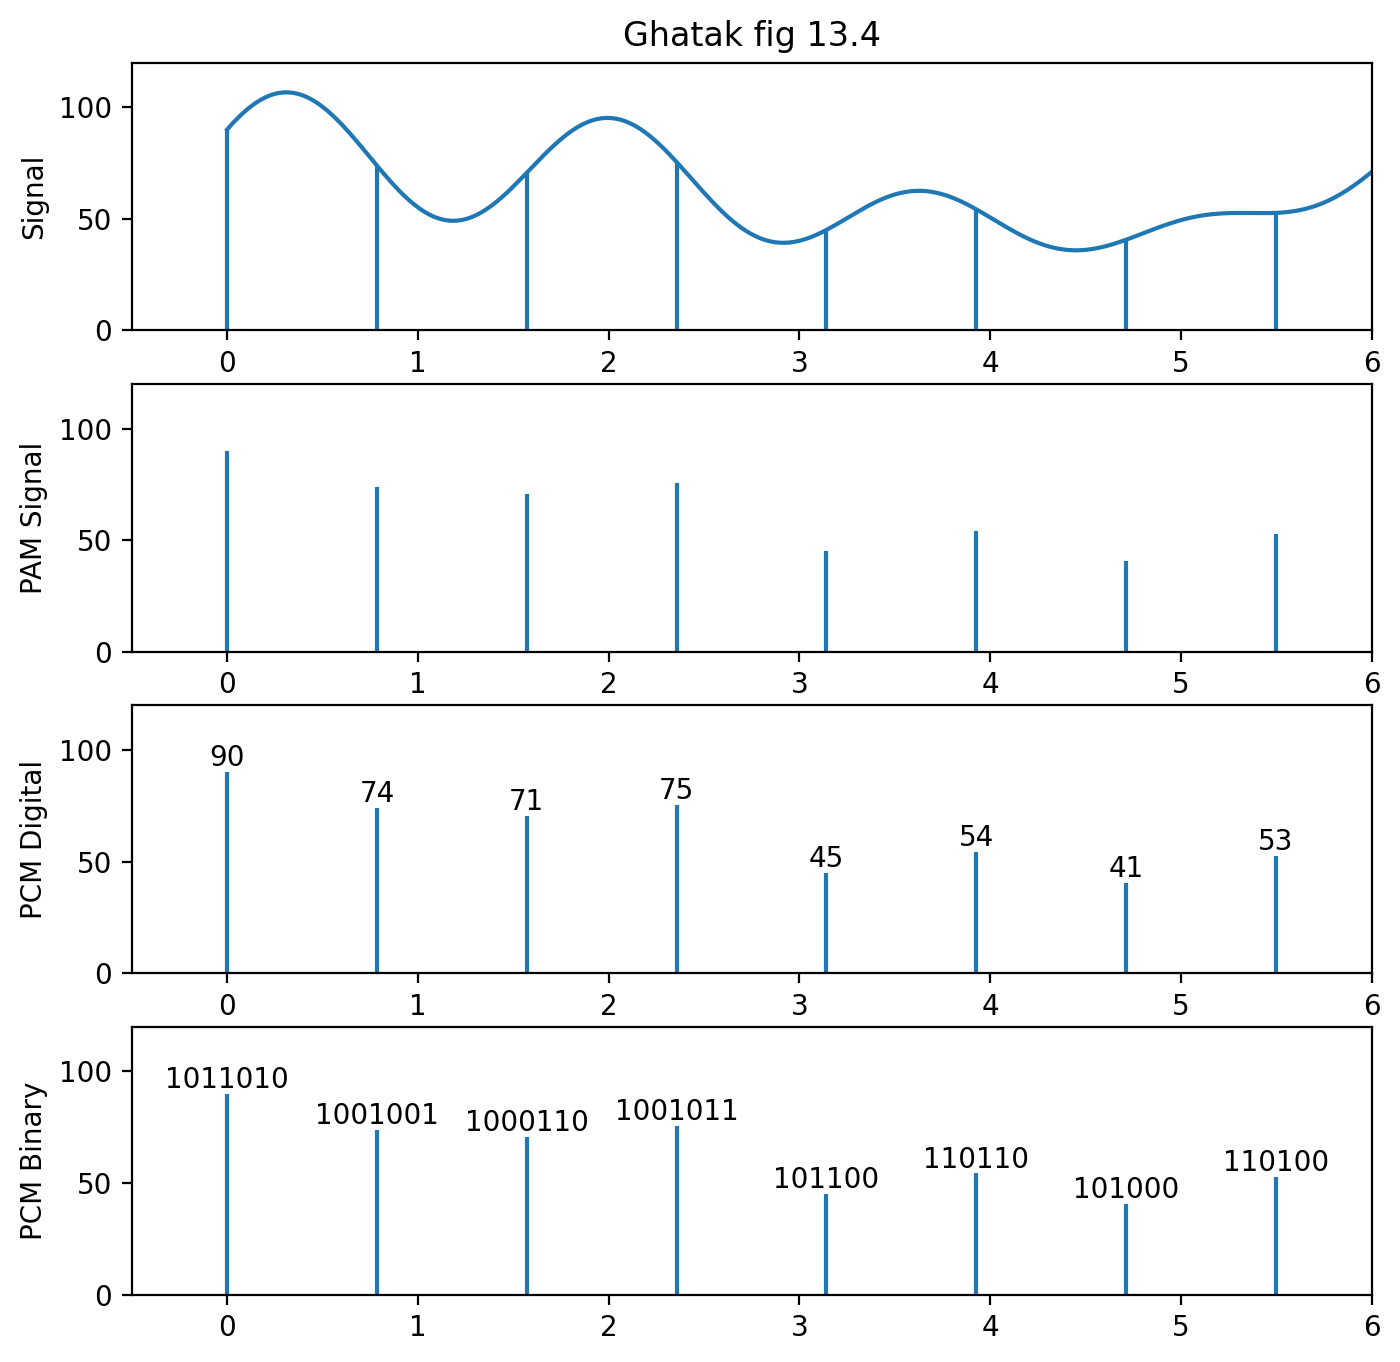

In [4]:
def eqn13_1(omega,t):
    sum  = 4 + np.sin(omega*t) + np.sin(1.5*omega*t)
    sum += np.cos(2*omega*t) + np.cos(3*omega*t) + np.sin(4*omega*t) 
    return 15*sum


t=np.linspace(0,4*np.pi,500)
tpulse = np.linspace(0,4*np.pi,17)
omega=1

plt.subplots(4,1,figsize=(8,8))

plt.subplot(4,1,1)
plt.title('Ghatak fig 13.4')
plt.plot(t, eqn13_1(omega,t))
plt.vlines(tpulse,[0], eqn13_1(omega,tpulse))
plt.ylim(0,120)

plt.ylabel('Signal')
plt.xlim(-0.5,6)

plt.subplot(4,1,2)
plt.vlines(tpulse,[0], eqn13_1(omega,tpulse))
plt.ylim(0,120)
plt.ylabel('PAM Signal')
plt.xlim(-0.5,6)


plt.subplot(4,1,3)
plt.vlines(tpulse,[0], eqn13_1(omega,tpulse))
for i in range(len(tpulse)):
    t = tpulse[i]
    y = eqn13_1(omega,t)
    plt.annotate("%.0f"%y,(t,y),ha='center',va='bottom')
plt.ylabel('PCM Digital')
plt.ylim(0,120)
plt.xlim(-0.5,6)



plt.subplot(4,1,4)
plt.vlines(tpulse,[0], eqn13_1(omega,tpulse))
for i in range(len(tpulse)):
    t = tpulse[i]
    y = eqn13_1(omega,t)
    s = bin(int(y))
    plt.annotate(s[2:],(t,y),ha='center',va='bottom')
plt.ylabel('PCM Binary')
plt.ylim(0,120)
plt.xlim(-0.5,6)


plt.show()


### Pulse Code Modulation

Return-to-zero and non-return-to-zero.  Like Ghatak figure 13.7

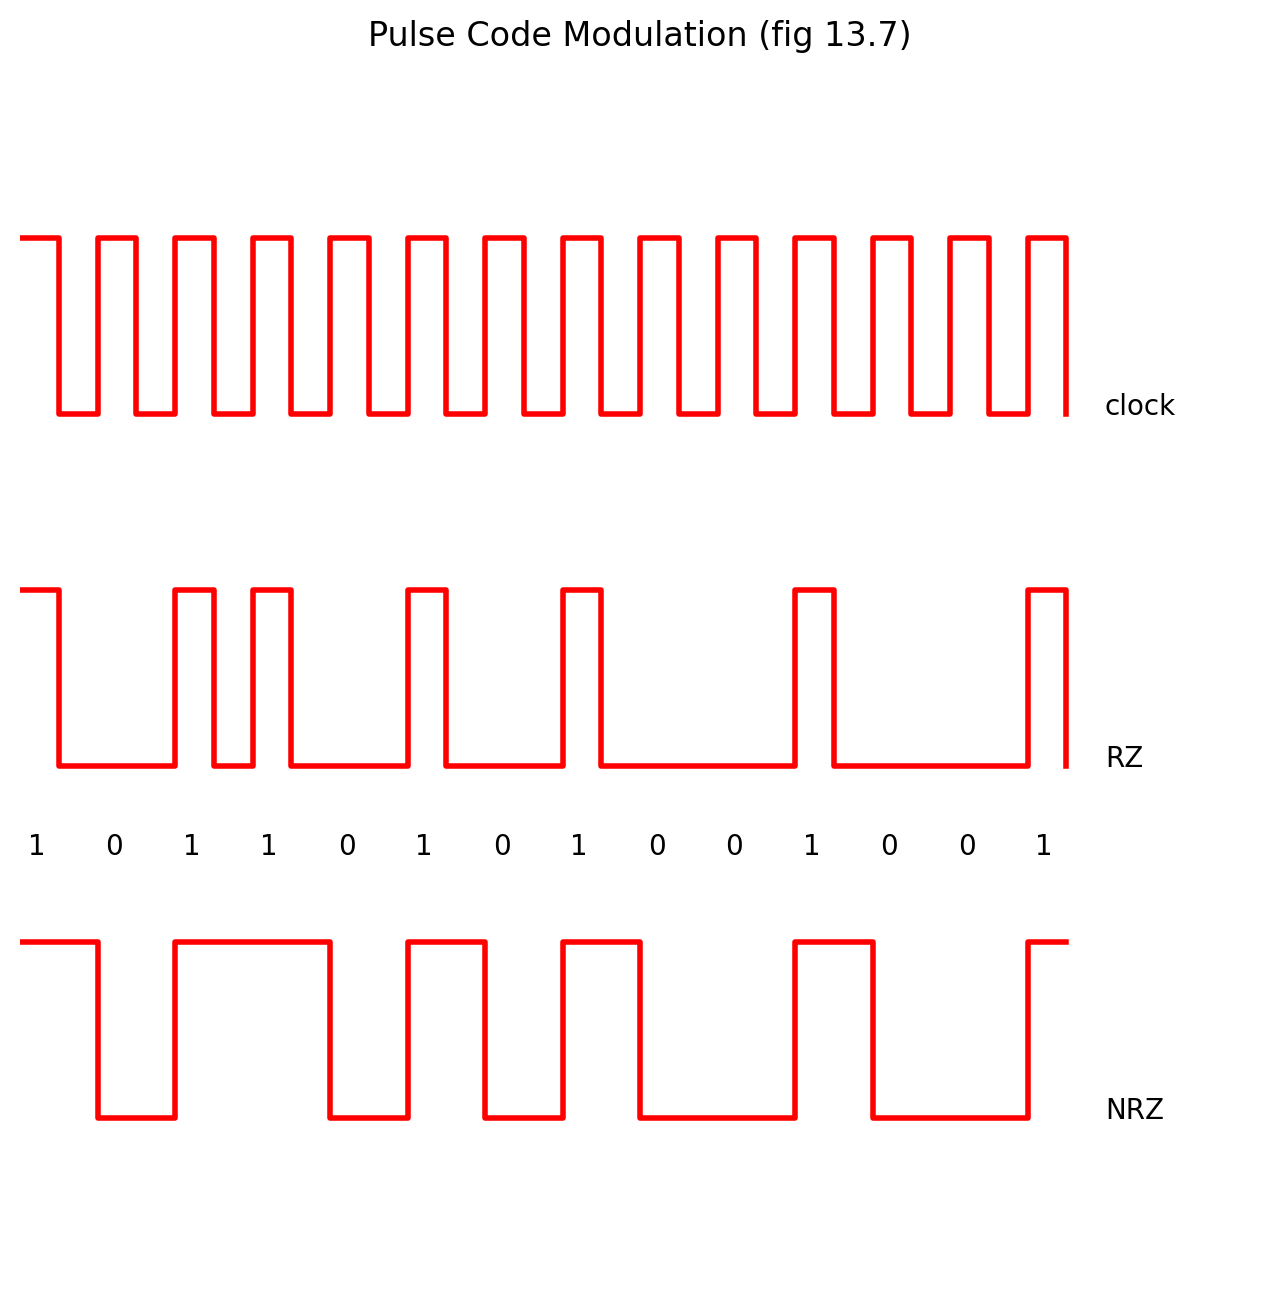

In [5]:
bits = [1,0,1,1,0,1,0,1,0,0,1,0,0,1]
data = np.repeat(bits, 2)
clock = 1 - np.arange(len(data)) % 2
t = 0.5 * np.arange(len(data))

plt.subplots(figsize=(8,8))
plt.step(t, clock + 4, 'r', linewidth = 2, where='post')
plt.step(t, data, 'r', linewidth = 2, where='post')
plt.step(t, data*clock + 2, 'r', linewidth = 2, where='post')

plt.ylim([-1,6])

for tbit, bit in enumerate(bits):
    plt.text(tbit+0.1, 1.5, str(bit))

plt.annotate('clock',xy=(14,4))
plt.annotate('NRZ',xy=(14,0))
plt.annotate('RZ',xy=(14,2))

plt.gca().axis('off')
plt.title('Pulse Code Modulation (fig 13.7)')
plt.xlim(0,16)
plt.show()

## Noise in Detection Processes

### Shot Noise

$$
\left\langle i_{NS}^2\right\rangle  = 2 q I \Delta f
$$

There is always some dark current $I_d$ that arises from thermal processes.

$$
\left\langle i_{NS}^2 \right\rangle  = 2 q (I + I_d) \Delta f
$$

$$
I_d \approx 1-10\mbox{ nA in Silicon}
$$

$$
I_d \approx 50-500\mbox{ nA in Germanium}
$$

$$
I_d \approx 1-20\mbox{ nA in InGaAs}
$$



Ghatak Example 13.3

In [6]:
sensitivity       = 0.65         # A/W
optical_signal    = 1e-6         # W
I = optical_signal * sensitivity # A
print("The photo induced current is %.2f uA"%(I*1e6))

Idark = 1e-9
bandwidth = 100e6

ns = ofiber.shot_noise(I,Idark,bandwidth)
print("The shot noise is %.2f nA"%(ns*1e9))

The photo induced current is 0.65 uA
The shot noise is 4.57 nA


### Thermal Noise

$$
\left\langle i_{NT}^2\right\rangle  =  \frac{ 4kT \Delta f}{R_{load}}
$$


Ghatak Example 13.4

In [7]:
T = 300 # K
Rload = 1000 # Ohms
bandwidth = 100e6

nt = ofiber.thermal_noise(T,Rload,bandwidth)
print("The thermal noise is %.1f nA"%(nt*1e9))

The thermal noise is 40.7 nA


### Signal to Noise Ratio

$$
\mbox{SNR} = \frac{\mbox{average signal power}}{\mbox{total noise power}}
$$

Average signal power is

$$
P_{ave} = \eta P_{optical}
$$

where $\eta$ is the responsivitity of the detector.

$$
\mbox{SNR} = \frac{\eta^2 P_{ave}^2}{ 2q(I+I_d)\Delta f + 4kT\Delta F/R_{load} } 
$$

The minimum detectable optical power corresponds to the situation when the signal power and the noise power are equal.


**This optical power is refered to as the noise equivalent power or NEP**

$$
\mbox{NEP} = \frac{1}{\eta} \sqrt{ 2qI_d + \frac{4kT}{R_{load}} }
$$

in units of watts/sqrt(Hz)

Ghatak Example 13.5

In [8]:
responsivity = 0.65  # A/W
Idark = 1e-9         # A
T = 300              # K
rload = 1000         # Ohms

nep = ofiber.NEP(responsivity,rload,Idark,T)
print("The noise equivalent power is %.1f pW/Hz**0.5"%(nep*1e12))

nep = ofiber.NEP(responsivity,rload,Idark,0)
print("The noise equivalent power is %.1f fW/Hz**0.5 (no thermal noise)"%(nep*1e15))

The noise equivalent power is 6.3 pW/Hz**0.5
The noise equivalent power is 27.5 fW/Hz**0.5 (no thermal noise)


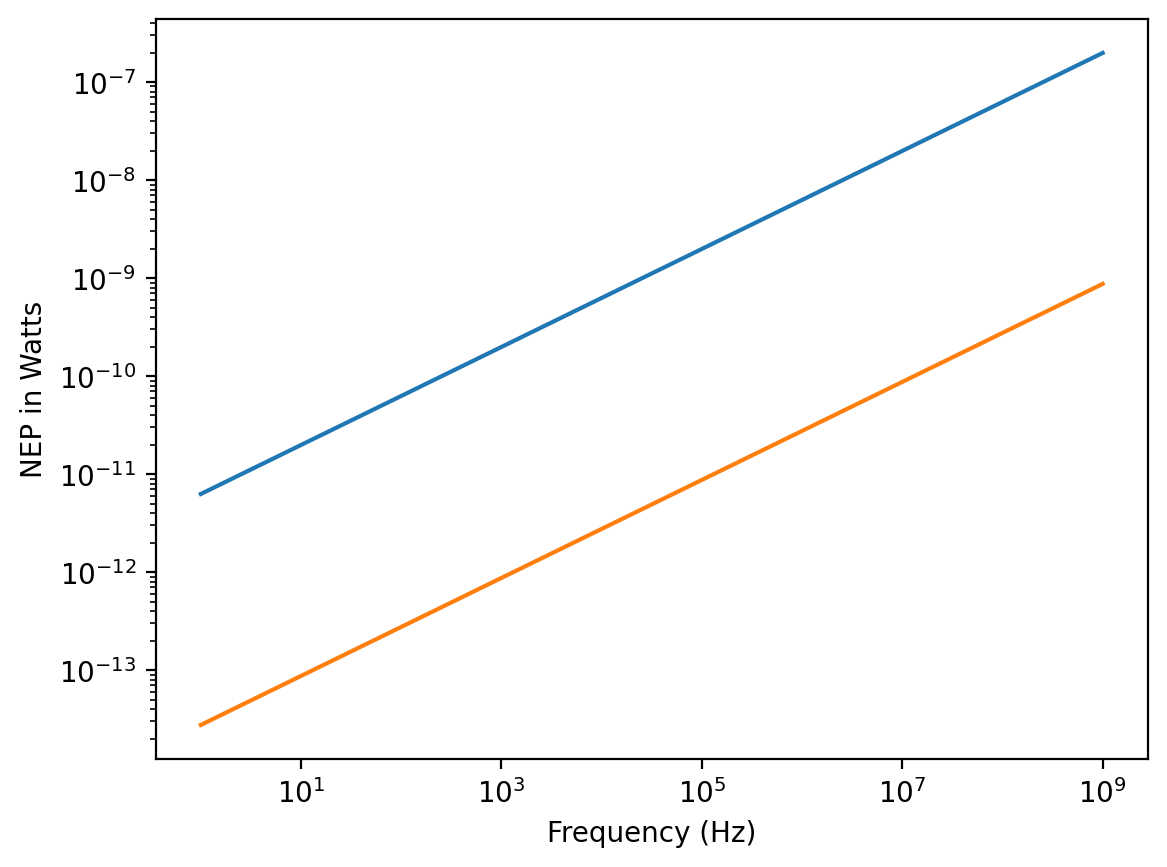

In [9]:
responsivity = 0.65  # A/W
Idark = 1e-9         # A
T = 300              # K
rload = 1000         # Ohms
f = np.geomspace(1,1e9)
nep = ofiber.NEP(responsivity,rload,Idark,T)
plt.loglog(f,nep*np.sqrt(f))

nep = ofiber.NEP(responsivity,rload,Idark,0)

plt.loglog(f,nep*np.sqrt(f))
plt.ylabel("NEP in Watts")
plt.xlabel("Frequency (Hz)")
plt.show()



## Relative noise magnitudes for photodetector
Ghatak Example 13.6

In [10]:
responsivity = 0.65  # A/W
Idark = 1e-9         # A
BW = 100e6           # Hz
T = 300              # K
rload = 1000         # Ohms
P = 500e-9           # W

I = P * responsivity # A
print('The photoinduced current is        %.1f nA'%(I*1e9))

noise1 = ofiber.shot_noise(I,0,BW)
print('Shot noise due to induced current is %.1f nA'%(noise1*1e9))

noise2 = ofiber.shot_noise(0,Idark,BW)
print('Shot noise due to    dark current is %.1f nA'%(noise2*1e9))

noise3 = ofiber.thermal_noise(T,rload,BW)
print('Thermal noise                     is %.1f nA'%(noise3*1e9))

noise = np.sqrt(noise1**2 + noise2**2 + noise3**2)
print('Total noise                       is %.1f nA'%(noise*1e9))


snr = I**2/noise**2
print('The SNR is %.0f or %.0f dB'%(snr, 10*np.log10(snr)))

The photoinduced current is        325.0 nA
Shot noise due to induced current is 3.2 nA
Shot noise due to    dark current is 0.2 nA
Thermal noise                     is 40.7 nA
Total noise                       is 40.8 nA
The SNR is 63 or 18 dB


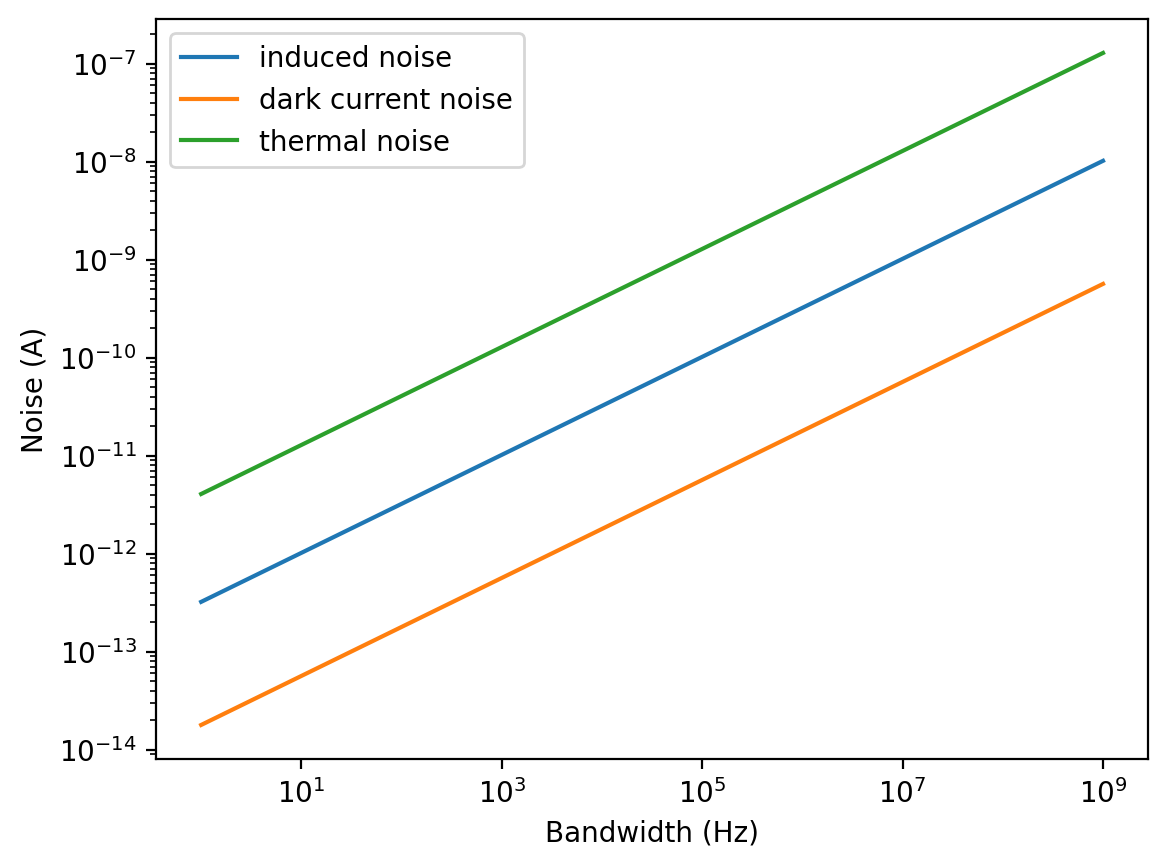

In [11]:
responsivity = 0.65  # A/W
Idark = 1e-9         # A
BW = 100e6           # Hz
T = 300              # K
rload = 1000         # Ohms
P = 500e-9           # W

I = P * responsivity # A
BW = np.geomspace(1,1e9)
nep = ofiber.NEP(responsivity,rload,Idark,T)


noise1 = ofiber.shot_noise(I,0,BW)
noise2 = ofiber.shot_noise(0,Idark,BW)
noise3 = ofiber.thermal_noise(T,rload,BW)
noise = np.sqrt(noise1**2 + noise2**2 + noise3**2)

plt.loglog(BW,noise1,label="induced noise")
plt.loglog(BW,noise2,label="dark current noise")
plt.loglog(BW,noise3,label="thermal noise")

plt.ylabel("Noise (A)")
plt.xlabel("Bandwidth (Hz)")
plt.legend()
plt.show()

## Noise in an Avalanche Photodiode
Ghatak Example 13.7

In [12]:
responsivity = 0.65  # A/W
Idark = 1e-9         # A
BW = 100e6           # Hz
T = 300              # K
rload = 1000         # Ohms
P = 500e-9           # W
M = 50
x = 0.0

I = M * P * responsivity # A
print('The photoinduced current is %.1f uA'%(I*1e6))

noise1 = ofiber.shot_noise(I,0,BW,M=M,x=x)
print('Shot noise due to induced current is %.1f nA'%(noise1*1e9))

noise2 = ofiber.shot_noise(0,Idark,BW,M=M,x=x)
print('Shot noise due to    dark current is %.1f nA'%(noise2*1e9))

noise3 = ofiber.thermal_noise(T,rload,BW)
print('Thermal noise                     is %.1f nA'%(noise3*1e9))

noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
print('The SNR is %.0f or %.0f dB'%(snr, 10*np.log10(snr)))

The photoinduced current is 16.2 uA
Shot noise due to induced current is 161.3 nA
Shot noise due to    dark current is 8.9 nA
Thermal noise                     is 40.7 nA
The SNR is 9509 or 40 dB


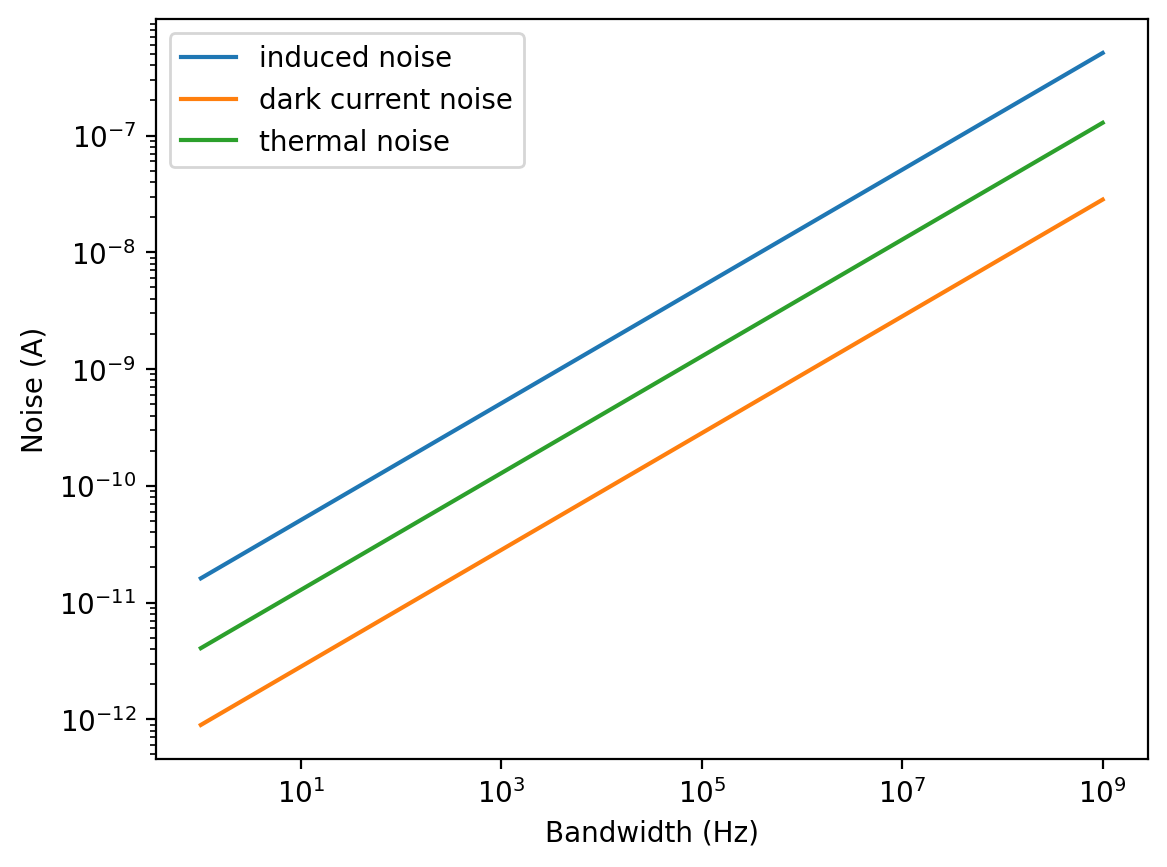

In [13]:
responsivity = 0.65  # A/W
Idark = 1e-9         # A
BW = 100e6           # Hz
T = 300              # K
rload = 1000         # Ohms
P = 500e-9           # W
M = 50
x = 0.0

I = M * P * responsivity # A

BW = np.geomspace(1,1e9)
nep = ofiber.NEP(responsivity,rload,Idark,T)


noise1 = ofiber.shot_noise(I,0,BW,M=M,x=x)

noise2 = ofiber.shot_noise(0,Idark,BW,M=M,x=x)

noise3 = ofiber.thermal_noise(T,rload,BW)

noise = np.sqrt(noise1**2 + noise2**2 + noise3**2)

plt.loglog(BW,noise1,label="induced noise")
plt.loglog(BW,noise2,label="dark current noise")
plt.loglog(BW,noise3,label="thermal noise")

plt.ylabel("Noise (A)")
plt.xlabel("Bandwidth (Hz)")
plt.legend()
plt.show()

### Amplification for Maximum SNR

$$
\left\langle i_{NS}^2\right\rangle  = M^{2+x} 2 q(\eta P_{optical}+I_d) \Delta f
$$

Silicon APD $x\approx0.3$

InGaAs APD $x\approx0.7$

Germanium APD $x\approx1$

$$
\mbox{SNR} = \frac{M^2\eta^2 P_{optical}^2}{ 2 qM^{2+x} (\eta P_{optical}+I_d) \Delta f + 4kT/R_{load} \Delta f} 
$$

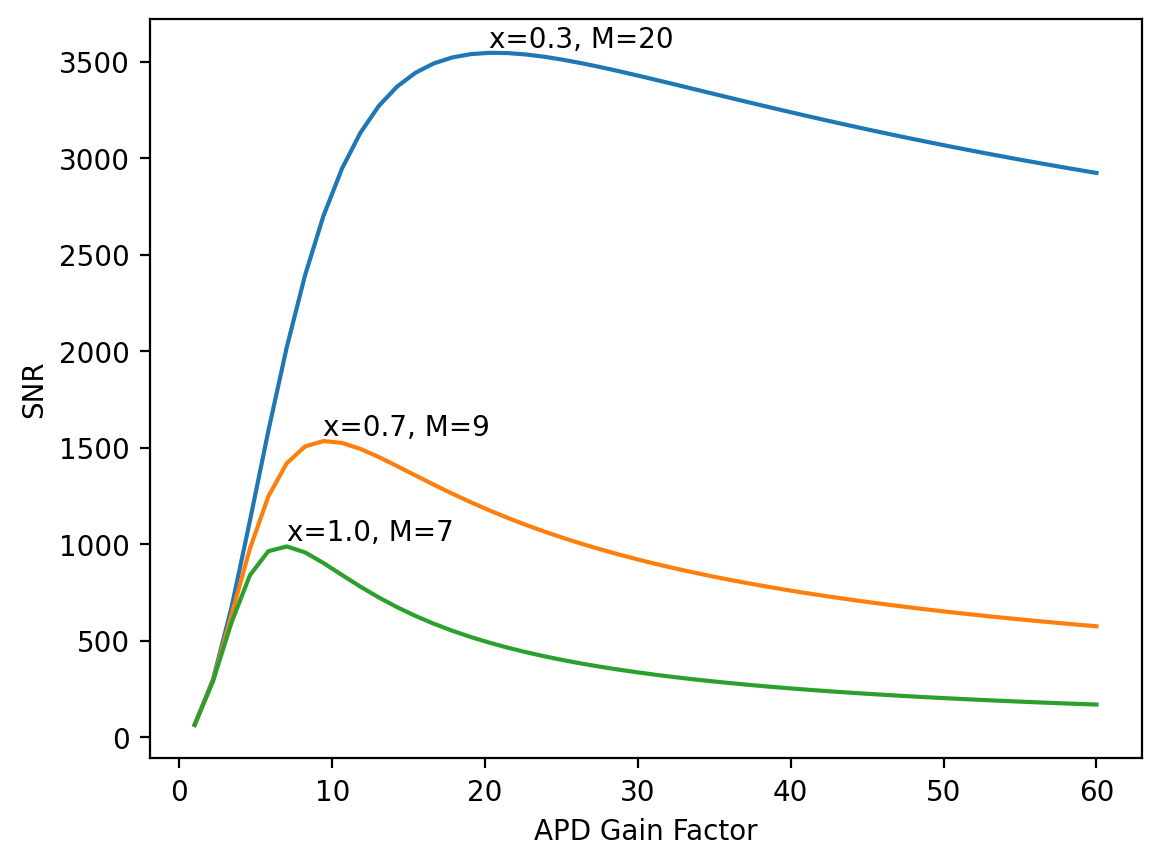

In [14]:
responsivity = 0.65  # A/W
Idark = 1e-9         # A
BW = 100e6           # Hz
T = 300              # K
rload = 1000         # Ohms
P = 500e-9           # W

M = np.linspace(1,60)
I = M * P * responsivity # A

x = 0.3
noise1 = ofiber.shot_noise(I,0,BW,M=M,x=x)
noise2 = ofiber.shot_noise(0,Idark,BW,M=M,x=x)
noise3 = ofiber.thermal_noise(T,rload,BW)
noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
plt.plot(M,snr)
ii=np.argmax(snr)
plt.annotate('x=%.1f, M=%.0f'%(x,M[ii]),xy=(M[ii],snr[ii]),va='bottom',ha='left')

x = 0.7
noise1 = ofiber.shot_noise(I,0,BW,M=M,x=x)
noise2 = ofiber.shot_noise(0,Idark,BW,M=M,x=x)
noise3 = ofiber.thermal_noise(T,rload,BW)
noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
plt.plot(M,snr)
ii=np.argmax(snr)
plt.annotate('x=%.1f, M=%.0f'%(x,M[ii]),xy=(M[ii],snr[ii]),va='bottom',ha='left')

x = 1.0
noise1 = ofiber.shot_noise(I,0,BW,M=M,x=x)
noise2 = ofiber.shot_noise(0,Idark,BW,M=M,x=x)
noise3 = ofiber.thermal_noise(T,rload,BW)
noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
plt.plot(M,snr)
ii=np.argmax(snr)
plt.annotate('x=%.1f, M=%.0f'%(x,M[ii]),xy=(M[ii],snr[ii]),va='bottom',ha='left')

plt.xlabel('APD Gain Factor')
plt.ylabel('SNR')
plt.show()

### Silicon APD 
Ghatak Example 13.8

In [15]:
responsivity = 0.65  # A/W
Idark = 1e-9         # A
BW = 100e6           # Hz
T = 300              # K
rload = 1000         # Ohms
P = 100e-9           # W
x = 0.3

I = P * responsivity # A

M = ofiber.best_APD_gain(I,rload,Idark,x,T)

print('For M=%.1f'%M)
I = M * P * responsivity # A
print('The photoinduced current is %.3f uA'%(I*1e6))

noise1 = ofiber.shot_noise(I,0,BW,M=M,x=x)
print('Shot noise due to induced current is %.1f nA'%(noise1*1e9))

noise2 = ofiber.shot_noise(0,Idark,BW,M=M,x=x)
print('Shot noise due to    dark current is %.1f nA'%(noise2*1e9))

noise3 = ofiber.thermal_noise(T,rload,BW)
print('Thermal noise                     is %.1f nA'%(noise3*1e9))

noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
print('The SNR is %.1f or %.1f dB'%(snr, 10*np.log10(snr)))

print()
M = 1
print('For M=%d'%M)
I = M * P * responsivity # A
print('The photoinduced current is %.3f uA'%(I*1e6))

noise1 = ofiber.shot_noise(I,0,BW,M=M,x=x)
print('Shot noise due to induced current is %.1f nA'%(noise1*1e9))

noise2 = ofiber.shot_noise(0,Idark,BW,M=M,x=x)
print('Shot noise due to    dark current is %.1f nA'%(noise2*1e9))

noise3 = ofiber.thermal_noise(T,rload,BW)
print('Thermal noise                     is %.1f nA'%(noise3*1e9))

noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
print('The SNR is %.1f or %.1f dB'%(snr, 10*np.log10(snr)))

For M=41.3
The photoinduced current is 2.687 uA
Shot noise due to induced current is 104.3 nA
Shot noise due to    dark current is 12.9 nA
Thermal noise                     is 40.7 nA
The SNR is 568.8 or 27.5 dB

For M=1
The photoinduced current is 0.065 uA
Shot noise due to induced current is 1.4 nA
Shot noise due to    dark current is 0.2 nA
Thermal noise                     is 40.7 nA
The SNR is 2.5 or 4.1 dB


### InGaAs APD

Ghatak Example 13.9

In [16]:

responsivity = 0.6  # A/W
Idark = 0            # A
T = 300              # K
rload = 1000         # Ohms
P = 500e-9           # W
x = 0.7

I = P * responsivity
M = ofiber.best_APD_gain(I,rload,Idark,x,T)
print('Optimal APD gain is M=%.1f'%M)

print('For M=%d'%M)
I = M * P * responsivity # A
print('The photoinduced current is %.3f uA'%(I*1e6))

noise1 = ofiber.shot_noise(I,0,BW,M=M,x=x)
print('Shot noise due to induced current is %.1f nA'%(noise1*1e9))

noise2 = ofiber.shot_noise(0,Idark,BW,M=M,x=x)
print('Shot noise due to    dark current is %.1f nA'%(noise2*1e9))

noise3 = ofiber.thermal_noise(T,rload,BW)
print('Thermal noise                     is %.1f nA'%(noise3*1e9))

noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
print('The SNR is %.1f or %.1f dB'%(snr, 10*np.log10(snr)))

print()
M = 1
print('For M=%d'%M)
I = M * P * responsivity # A
print('The photoinduced current is %.3f uA'%(I*1e6))

noise1 = ofiber.shot_noise(I,0,BW,M=M,x=x)
print('Shot noise due to induced current is %.1f nA'%(noise1*1e9))

noise2 = ofiber.shot_noise(0,Idark,BW,M=M,x=x)
print('Shot noise due to    dark current is %.1f nA'%(noise2*1e9))

noise3 = ofiber.thermal_noise(T,rload,BW)
print('Thermal noise                     is %.1f nA'%(noise3*1e9))

noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
print('The SNR is %.1f or %.1f dB'%(snr, 10*np.log10(snr)))

Optimal APD gain is M=9.9
For M=9
The photoinduced current is 2.980 uA
Shot noise due to induced current is 68.8 nA
Shot noise due to    dark current is 0.0 nA
Thermal noise                     is 40.7 nA
The SNR is 1390.3 or 31.4 dB

For M=1
The photoinduced current is 0.300 uA
Shot noise due to induced current is 3.1 nA
Shot noise due to    dark current is 0.0 nA
Thermal noise                     is 40.7 nA
The SNR is 54.0 or 17.3 dB


### Germanium Detector

Ghatak Example 13.10

In [17]:
responsivity = 0.45  # A/W
Idark = 0            # A
T = 300              # K
rload = 1000         # Ohms
P = 100e-9           # W
x = 1.0

I = P * responsivity
M = ofiber.best_APD_gain(I,rload,Idark,x,T)
print('Optimal APD gain is M=%.1f'%M)

print('For M=%d'%M)
I = M * P * responsivity # A
print('The photoinduced current is %.3f uA'%(I*1e6))

noise1 = ofiber.shot_noise(I,0,BW,M=M,x=x)
print('Shot noise due to induced current is %.1f nA'%(noise1*1e9))

noise2 = ofiber.shot_noise(0,Idark,BW,M=M,x=x)
print('Shot noise due to    dark current is %.1f nA'%(noise2*1e9))

noise3 = ofiber.thermal_noise(T,rload,BW)
print('Thermal noise                     is %.1f nA'%(noise3*1e9))

noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
print('The SNR is %.1f or %.1f dB'%(snr, 10*np.log10(snr)))

print()
M = 1
print('For M=%d'%M)
I = M * P * responsivity # A
print('The photoinduced current is %.3f uA'%(I*1e6))

noise1 = ofiber.shot_noise(I,0,BW,M=M,x=x)
print('Shot noise due to induced current is %.1f nA'%(noise1*1e9))

noise2 = ofiber.shot_noise(0,Idark,BW,M=M,x=x)
print('Shot noise due to    dark current is %.1f nA'%(noise2*1e9))

noise3 = ofiber.thermal_noise(T,rload,BW)
print('Thermal noise                     is %.1f nA'%(noise3*1e9))

noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
print('The SNR is %.1f or %.1f dB'%(snr, 10*np.log10(snr)))


Optimal APD gain is M=13.2
For M=13
The photoinduced current is 0.594 uA
Shot noise due to induced current is 57.5 nA
Shot noise due to    dark current is 0.0 nA
Thermal noise                     is 40.7 nA
The SNR is 71.0 or 18.5 dB

For M=1
The photoinduced current is 0.045 uA
Shot noise due to induced current is 1.2 nA
Shot noise due to    dark current is 0.0 nA
Thermal noise                     is 40.7 nA
The SNR is 1.2 or 0.9 dB


## Bit Error Rate (BER)

$$
\mbox{BER} = \frac{\mbox{bits read erroneously in a duration t}}{\mbox{total number of bits received in duration t}}
$$

and

$$
\mbox{BER} = \frac{1}{2}\left[1-\mbox{erf}\left(\frac{\sqrt{\mbox{SNR}}}{2\sqrt{2}} \right)\right]
$$

Ghatak Fig 13.12

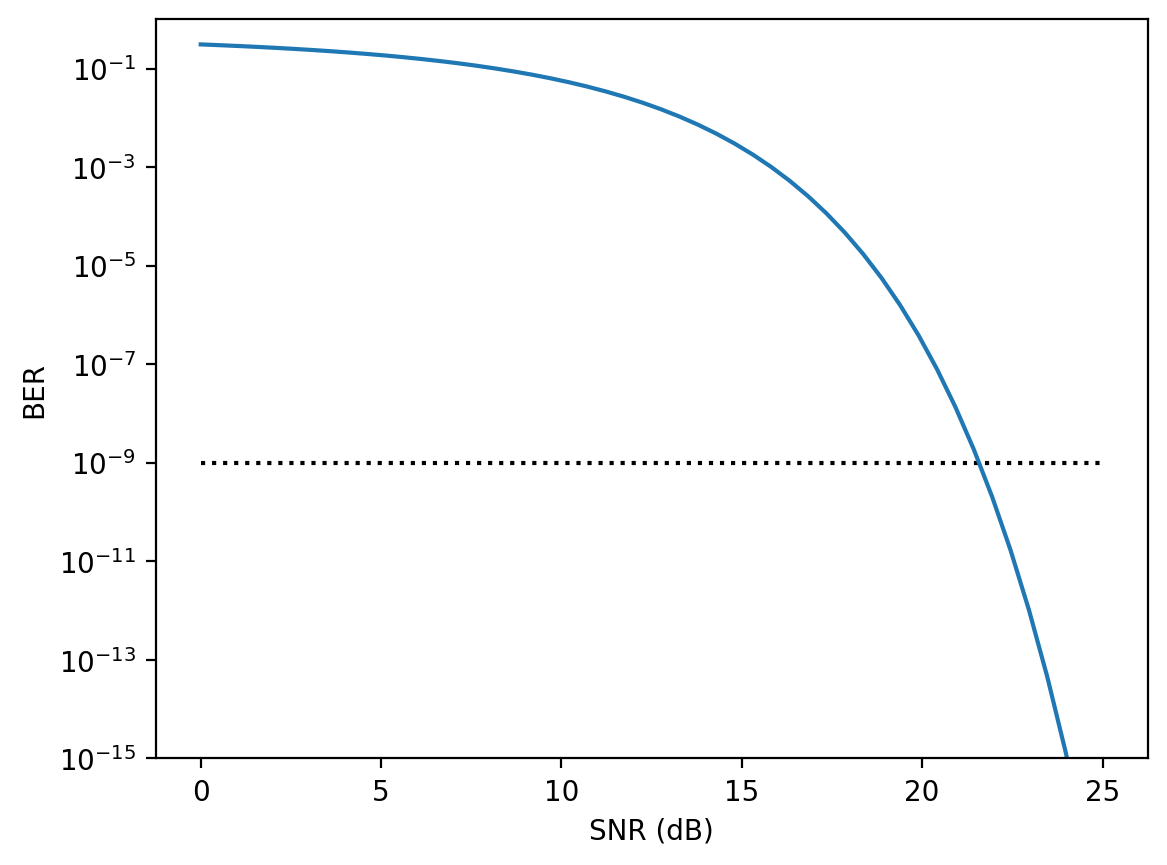

In [18]:
snr = np.linspace(0,25,50)          # dB
ber = ofiber.BER_at_SNR(10**(snr/10))
plt.plot([0,25],[1e-9,1e-9],':k')
plt.semilogy(snr,ber)
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.ylim(1e-15,1e0)
plt.show()

## Example 13.11

In [19]:
C = 1e-12          # Farads
T = 300            # K
responsivity = 0.5 # A/W
ber = 1e-12         #
snr = ofiber.SNR_at_BER(ber)

bitrate = 100e6    # bits/second
pmin = ofiber.thermal_min_power(bitrate,responsivity,C,T,snr)
dbm = 10*np.log10(pmin/1e-3)
print('for a bitrate of 100Mb the minimum optical power is %.2f uW or %.1f dBm'%(pmin*1e6,dbm))

bitrate = 1e9      # bits/second
snr = ofiber.SNR_at_BER(ber)
pmin = ofiber.thermal_min_power(bitrate,responsivity,C,T,snr)
dbm = 10*np.log10(pmin/1e-3)
print('for a bitrate of 1Gb the minimum optical power is %.2f uW or %.1f dBm'%(pmin*1e6,dbm))

for a bitrate of 100Mb the minimum optical power is 0.45 uW or -33.4 dBm
for a bitrate of 1Gb the minimum optical power is 4.54 uW or -23.4 dBm


## Example 13.12

In [20]:
C = 1e-12               # Farads
T = 300                 # K
responsivity = 0.5      # A/W
ber = 1e-12              #
snr = ofiber.SNR_at_BER(ber)

bitrate = 100e6    # bits/second
pmin = ofiber.thermal_min_power(bitrate,responsivity,C,T,snr)
dbm = 10*np.log10(pmin/1e-3)
print('for a bitrate of 100Mb the minimum optical power is %.2f uW or %.1f dBm'%(pmin*1e6,dbm))

bitrate = 1e9      # bits/second
snr = ofiber.SNR_at_BER(ber)
pmin = ofiber.thermal_min_power(bitrate,responsivity,C,T,snr)
dbm = 10*np.log10(pmin/1e-3)
print('for a bitrate of 1Gb the minimum optical power is %.2f uW or %.1f dBm'%(pmin*1e6,dbm))

for a bitrate of 100Mb the minimum optical power is 0.45 uW or -33.4 dBm
for a bitrate of 1Gb the minimum optical power is 4.54 uW or -23.4 dBm


## Quantum baseline

In [21]:
bitrate = 1e9      # bits/second
lambda0 = 1550e-9  # m
ber = 1e-9

pquant = ofiber.quantum_min_power(bitrate,ber,lambda0)
dbm = 10*np.log10(pquant/1e-3)
print('for a bitrate of 1Gb the minimum optical power is %.2f nW or %.1f dBm'%(pquant*1e9,dbm))

for a bitrate of 1Gb the minimum optical power is 2.57 nW or -55.9 dBm
